In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import astropy as ap
from astropy import constants as const
from astropy import units as u

default_size = 18
plt.rcParams.update({
    'font.size': default_size,  # This sets the default font size for everything
    'axes.titlesize': default_size,
    'axes.labelsize': default_size,
    'xtick.labelsize': default_size,
    'ytick.labelsize': default_size,
    'legend.fontsize': default_size,
    'figure.titlesize': default_size
})

figsize = 4.5
dpi = 350
import matplotlib.ticker as ticker
plt.style.use('style_prof2.mplstyle')

In [2]:
names = ['m','r','T','rho','P','l','X_H','X_He4','X_He3','X_C12','X_N14','X_O16','X_7Be','nu pp','nu B8','nu N13','nu O15','nu F17','nu Be7','nu pep','nu hep']
df_solar_model = pd.read_csv('Smoothed_Solar_Model.csv',names=names,skiprows=1,index_col=False)
print(df_solar_model)

            m         r             T         rho             P         l  \
0    0.000593  0.001610  1.551290e+07  150.271827  2.340000e+17  0.000010   
1    0.000528  0.002592  1.550882e+07  150.231974  2.340000e+17  0.000022   
2    0.000465  0.003575  1.550421e+07  150.175839  2.340000e+17  0.000040   
3    0.000405  0.004557  1.549906e+07  150.102663  2.340000e+17  0.000083   
4    0.000347  0.005540  1.549337e+07  150.011763  2.330000e+17  0.000150   
..        ...       ...           ...         ...           ...       ...   
995  0.999886  0.979150  1.018921e+05    0.001443  1.890270e+10  0.998886   
996  0.999872  0.980133  9.695302e+04    0.001311  1.621205e+10  0.998881   
997  0.999857  0.981115  9.209652e+04    0.001185  1.379242e+10  0.998877   
998  0.999840  0.982098  8.732742e+04    0.001066  1.163257e+10  0.998871   
999  0.999823  0.983080  8.265072e+04    0.000953  9.720154e+09  0.998866   

          X_H     X_He4     X_He3     X_C12  ...     X_O16         X_7Be  \

In [3]:
def plotQuantity(x_quantity,y_quantity,x_logged,y_logged,axes, linewidth, color, x_label,y_label,title):
    x = np.array(df_solar_model[x_quantity])
    y = np.array(df_solar_model[y_quantity])

    axes.plot(x,y,lw=linewidth,color=color)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label,labelpad = 5)
    axes.set_title(title)
    
    if x_logged == True:
        axes.set_xscale('log')

    if y_logged == True:
        axes.set_yscale('log')

## Temperature

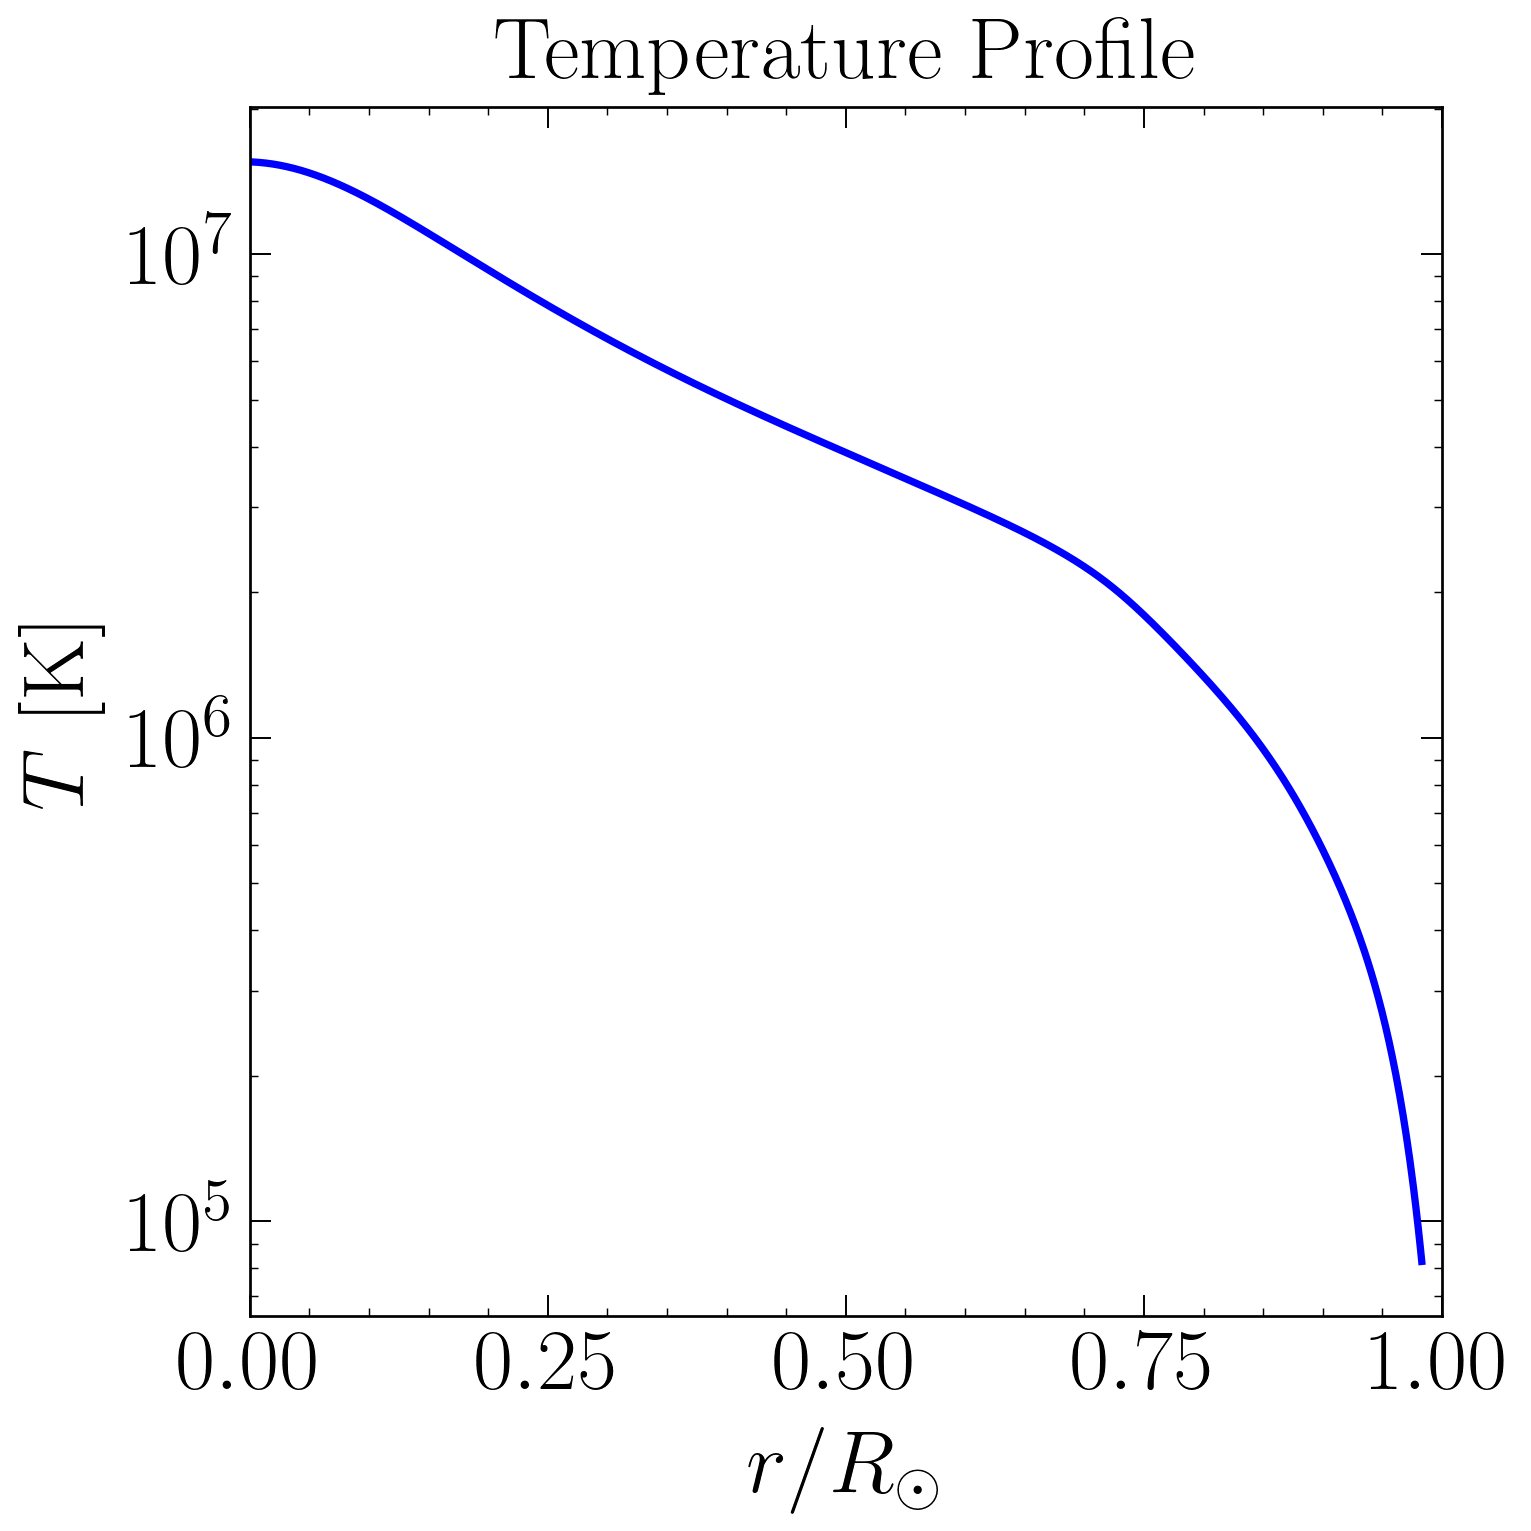

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
plotQuantity('r','T',False,True,ax,1.5,'blue',r'$r/R_\odot$','$T$ [K]','Temperature Profile')
ax.set_xlim(0,1)
#ax.legend()
plt.tight_layout()
plt.savefig('Images/T(r).png')
plt.show()

## Density

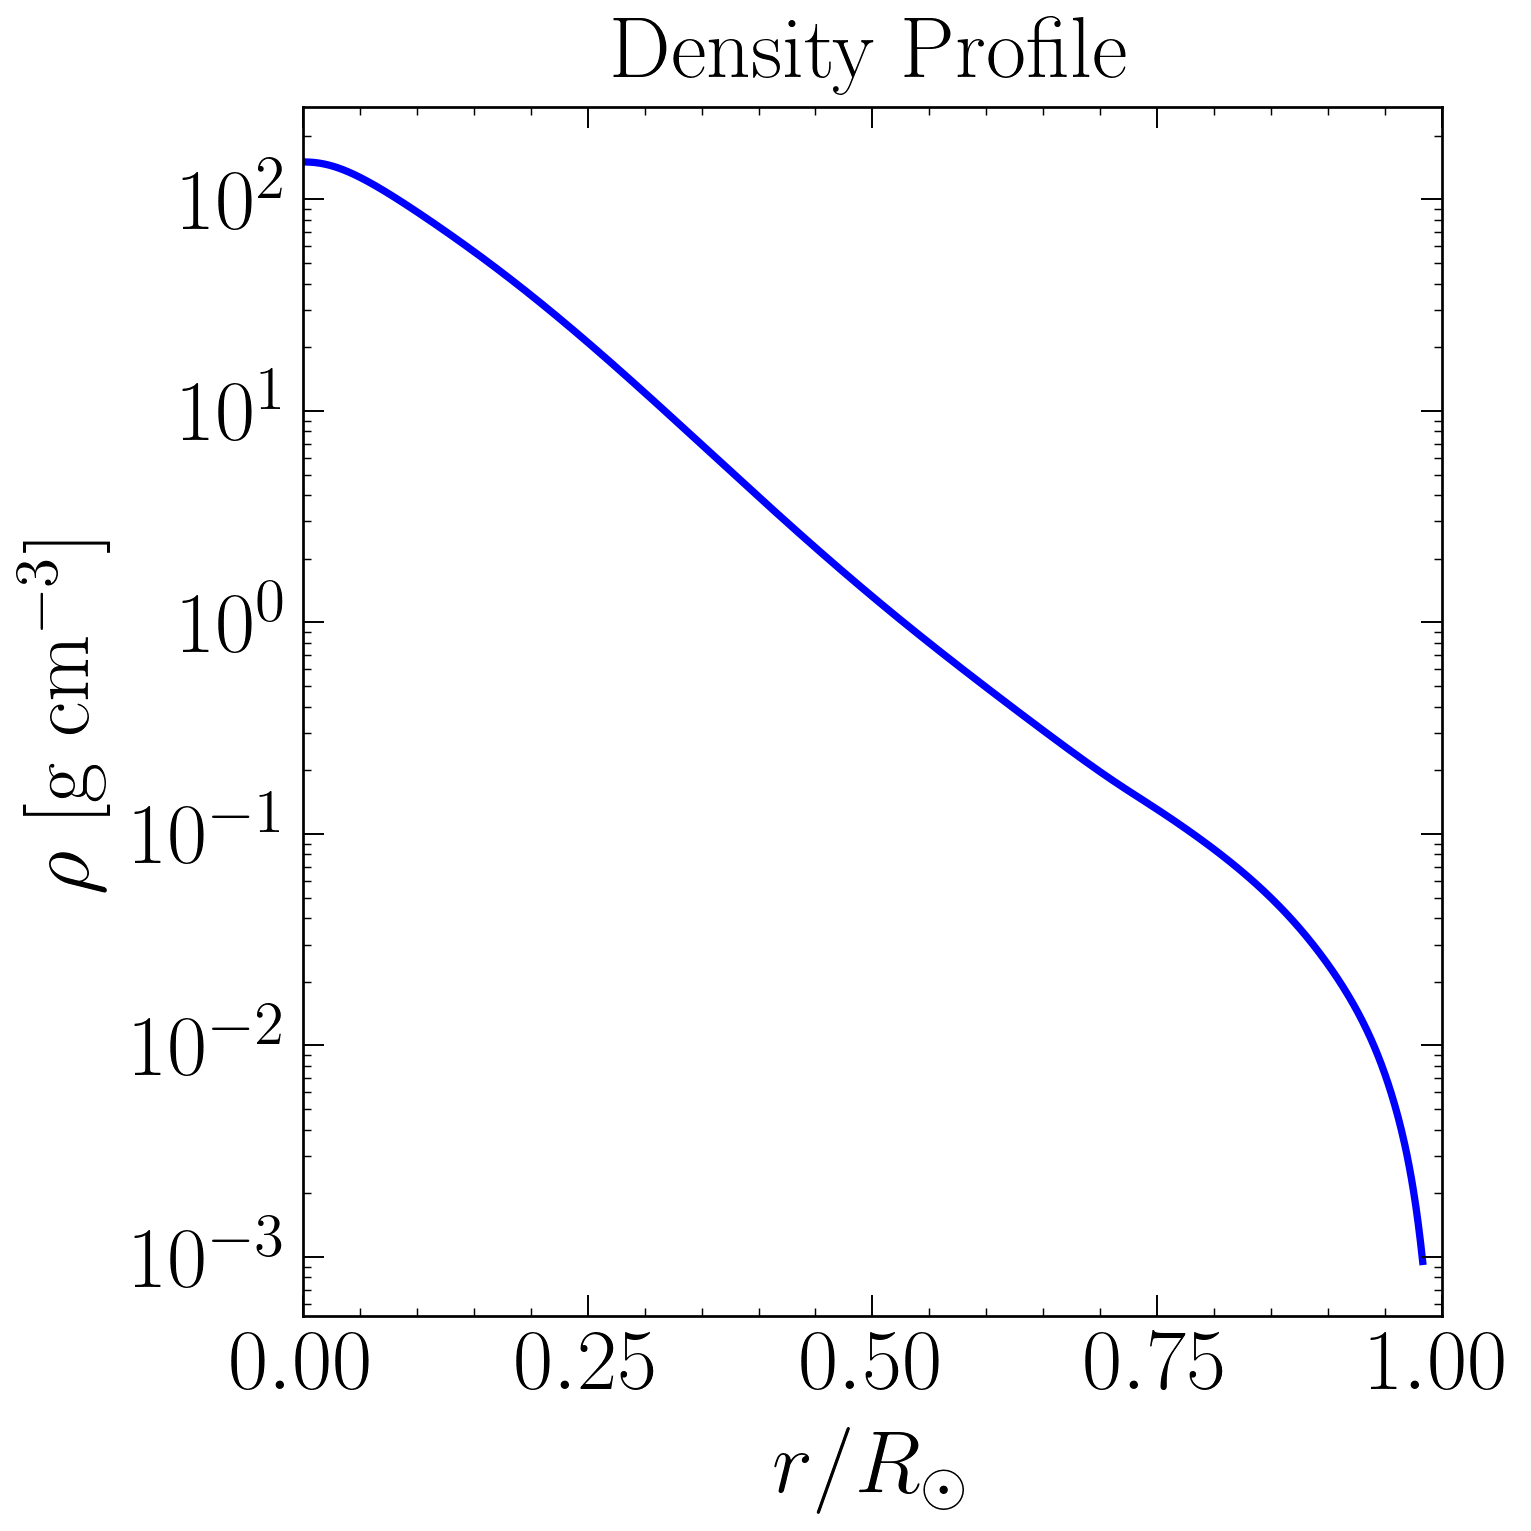

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
plotQuantity('r','rho',False,True,ax,1.5,'blue',r'$r/R_\odot$',r'$\rho$ [g cm$^{-3}$]','Density Profile')
ax.set_xlim(0,1)
#ax.legend()
plt.tight_layout()
plt.savefig('Images/rho(r).png')
plt.show()

## Pressure

In [6]:
from matplotlib.ticker import LogLocator, LogFormatter, LogFormatterSciNotation

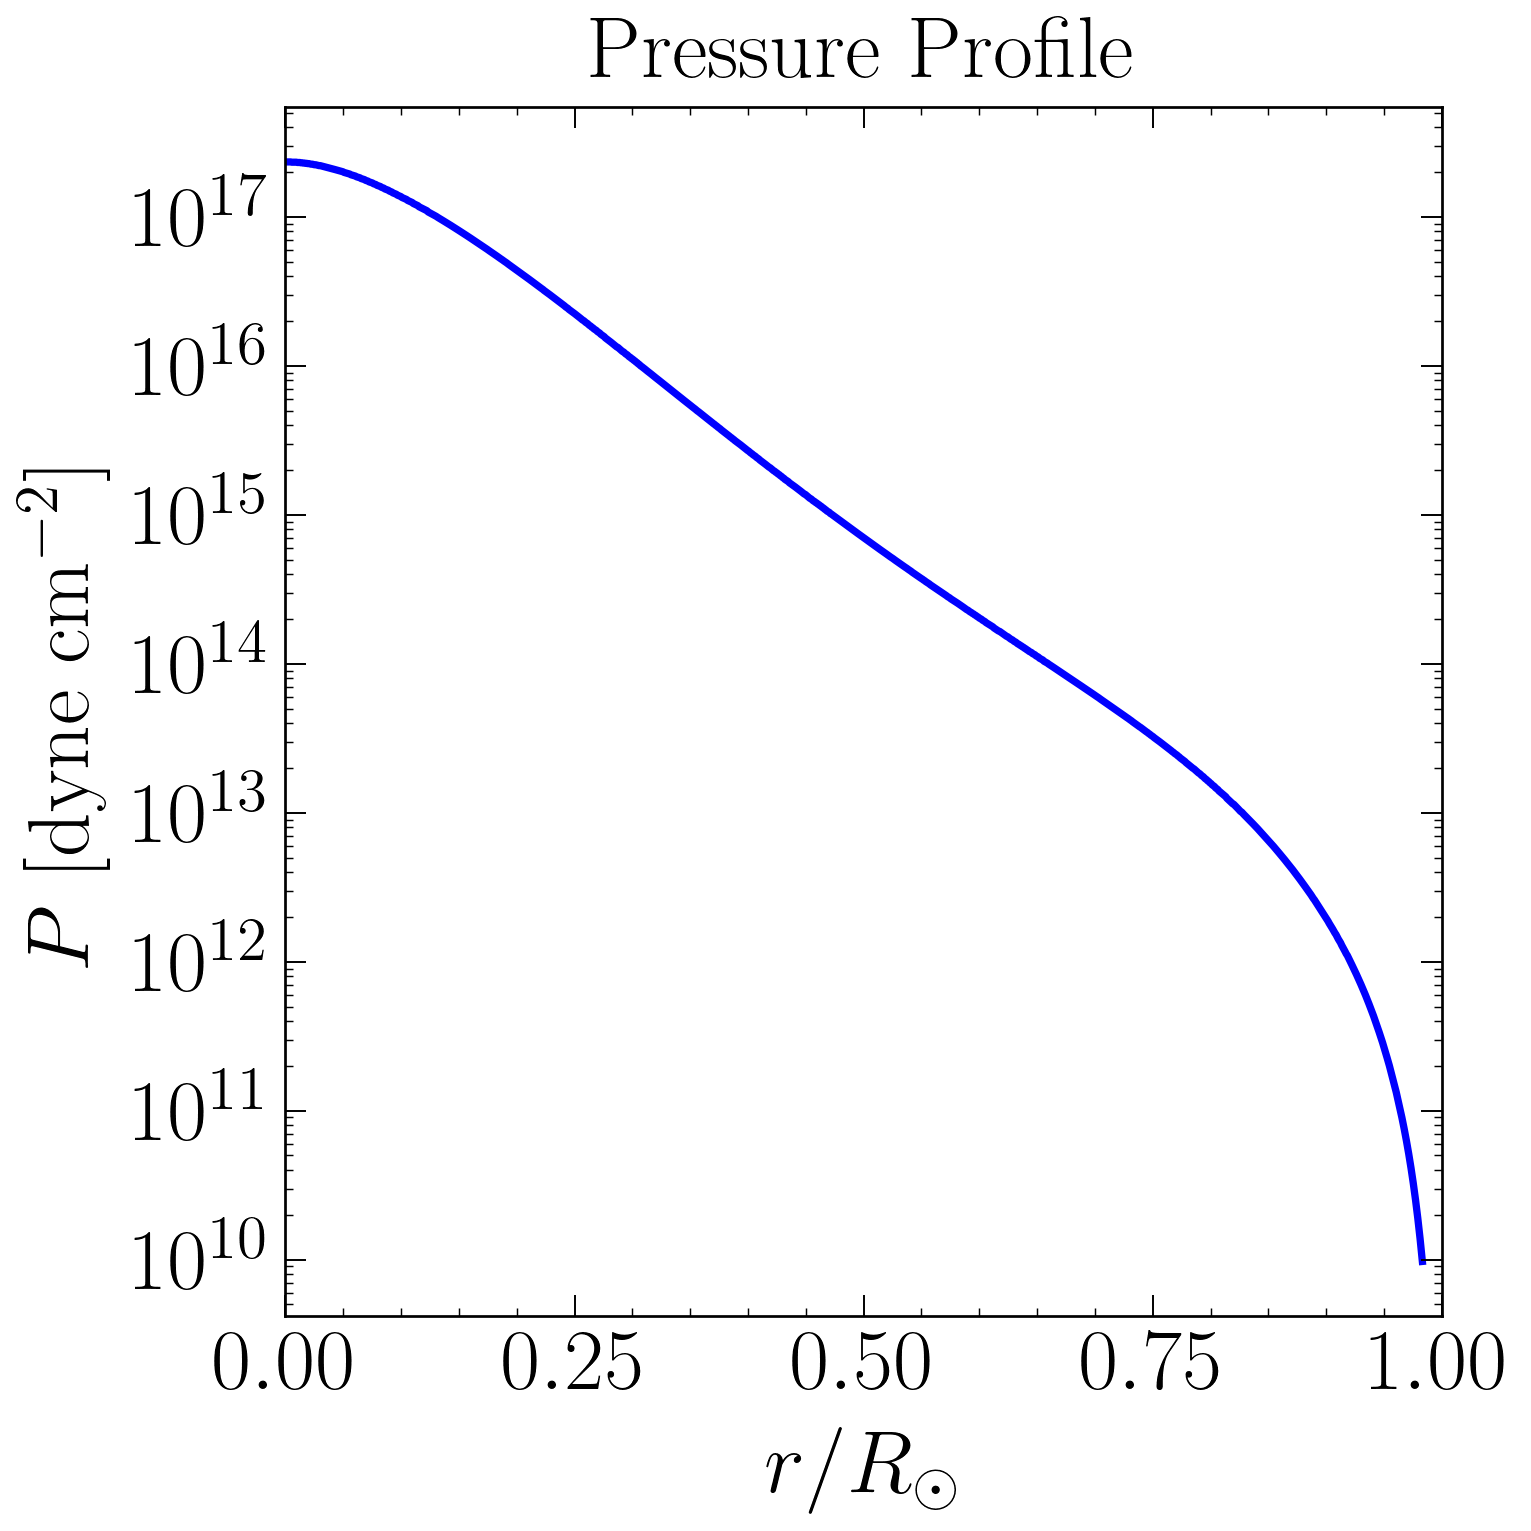

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
plotQuantity('r','P',False,True,ax,1.5,'blue',r'$r/R_\odot$',r'$P$ [dyne cm$^{-2}$]','Pressure Profile')
ax.set_xlim(0,1)
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[], numticks=10))
ax.yaxis.set_major_formatter(LogFormatterSciNotation())
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100))
#ax.minorticks_on()
#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs='all', numticks=1))
#ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='all', numticks=10))
#ax.legend()
plt.tight_layout()
plt.savefig('Images/P(r).png')
plt.show()

## Hydrogen and Helium

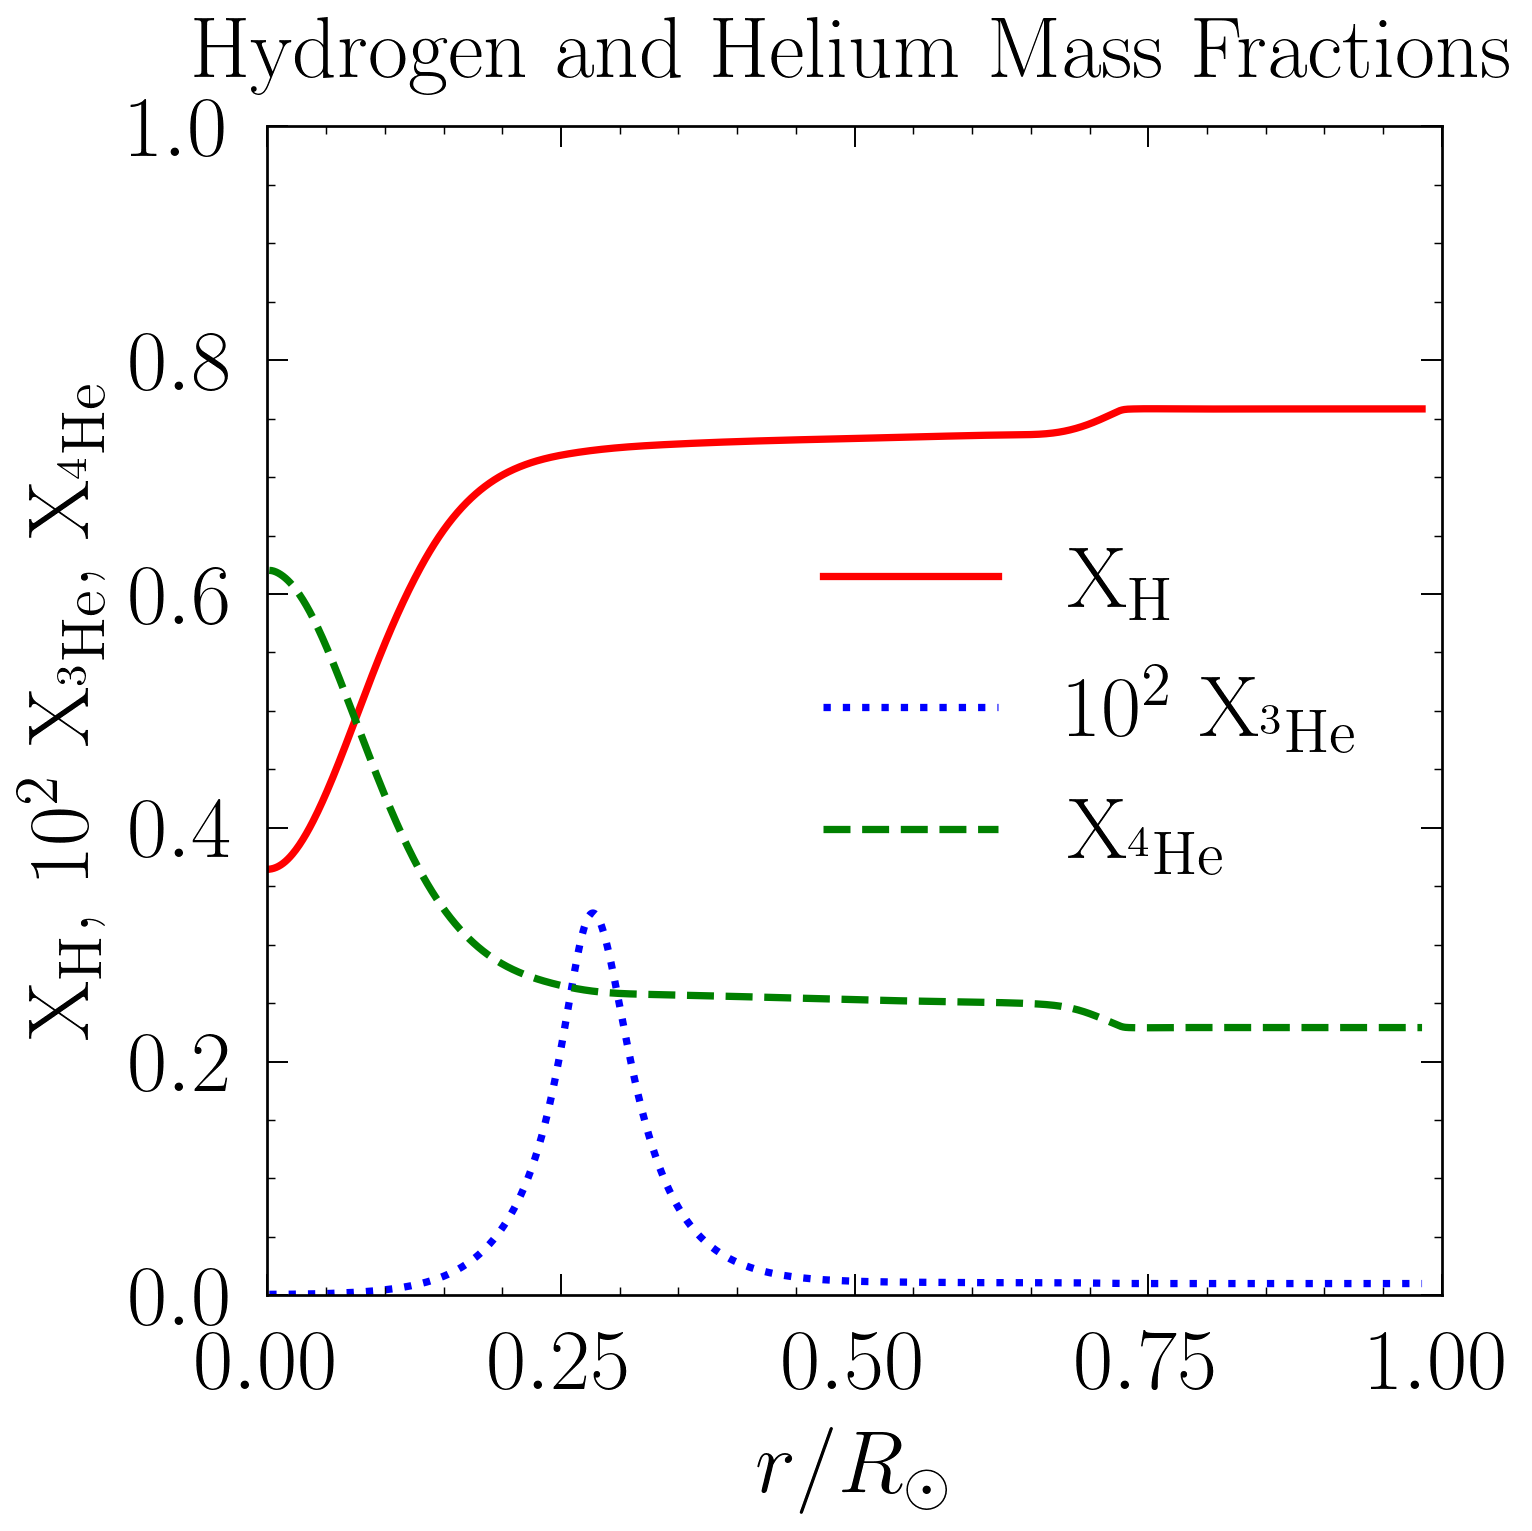

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
x = np.array(df_solar_model['r'])
y0 = np.array(df_solar_model['X_H'])
y1 = np.array(df_solar_model['X_He3'])
y2 = np.array(df_solar_model['X_He4'])

axes.plot(x,y0,lw=1.5,ls='solid',color='red',label=r'X$_\mathrm{H}$')
axes.plot(x,100*y1,lw=1.5,ls='dotted',color='blue',label=r'$10^2$ X$_{^3 \mathrm{He}}$')
axes.plot(x,y2,lw=1.5,ls='dashed',color='green',label=r'X$_{^4 \mathrm{He}}$')
axes.set_xlabel(r'$r/R_\odot$')
axes.set_ylabel(r'X$_\mathrm{H}$, $10^2$ X$_{^3 \mathrm{He}}$, X$_{^4 \mathrm{He}}$',labelpad = 5)
axes.set_title('Hydrogen and Helium Mass Fractions',pad=10)
axes.set_xlim(0,1)
axes.set_ylim(0,1)
axes.tick_params(axis='x', pad=7)  # Increase padding for x-axis tick labels
axes.tick_params(axis='y', pad=7)
axes.legend()
plt.tight_layout()
plt.savefig('Images/X_nonmetal(r).png')
plt.show()

## Metals

'X_C12','X_N14','X_N16','X_7Be'

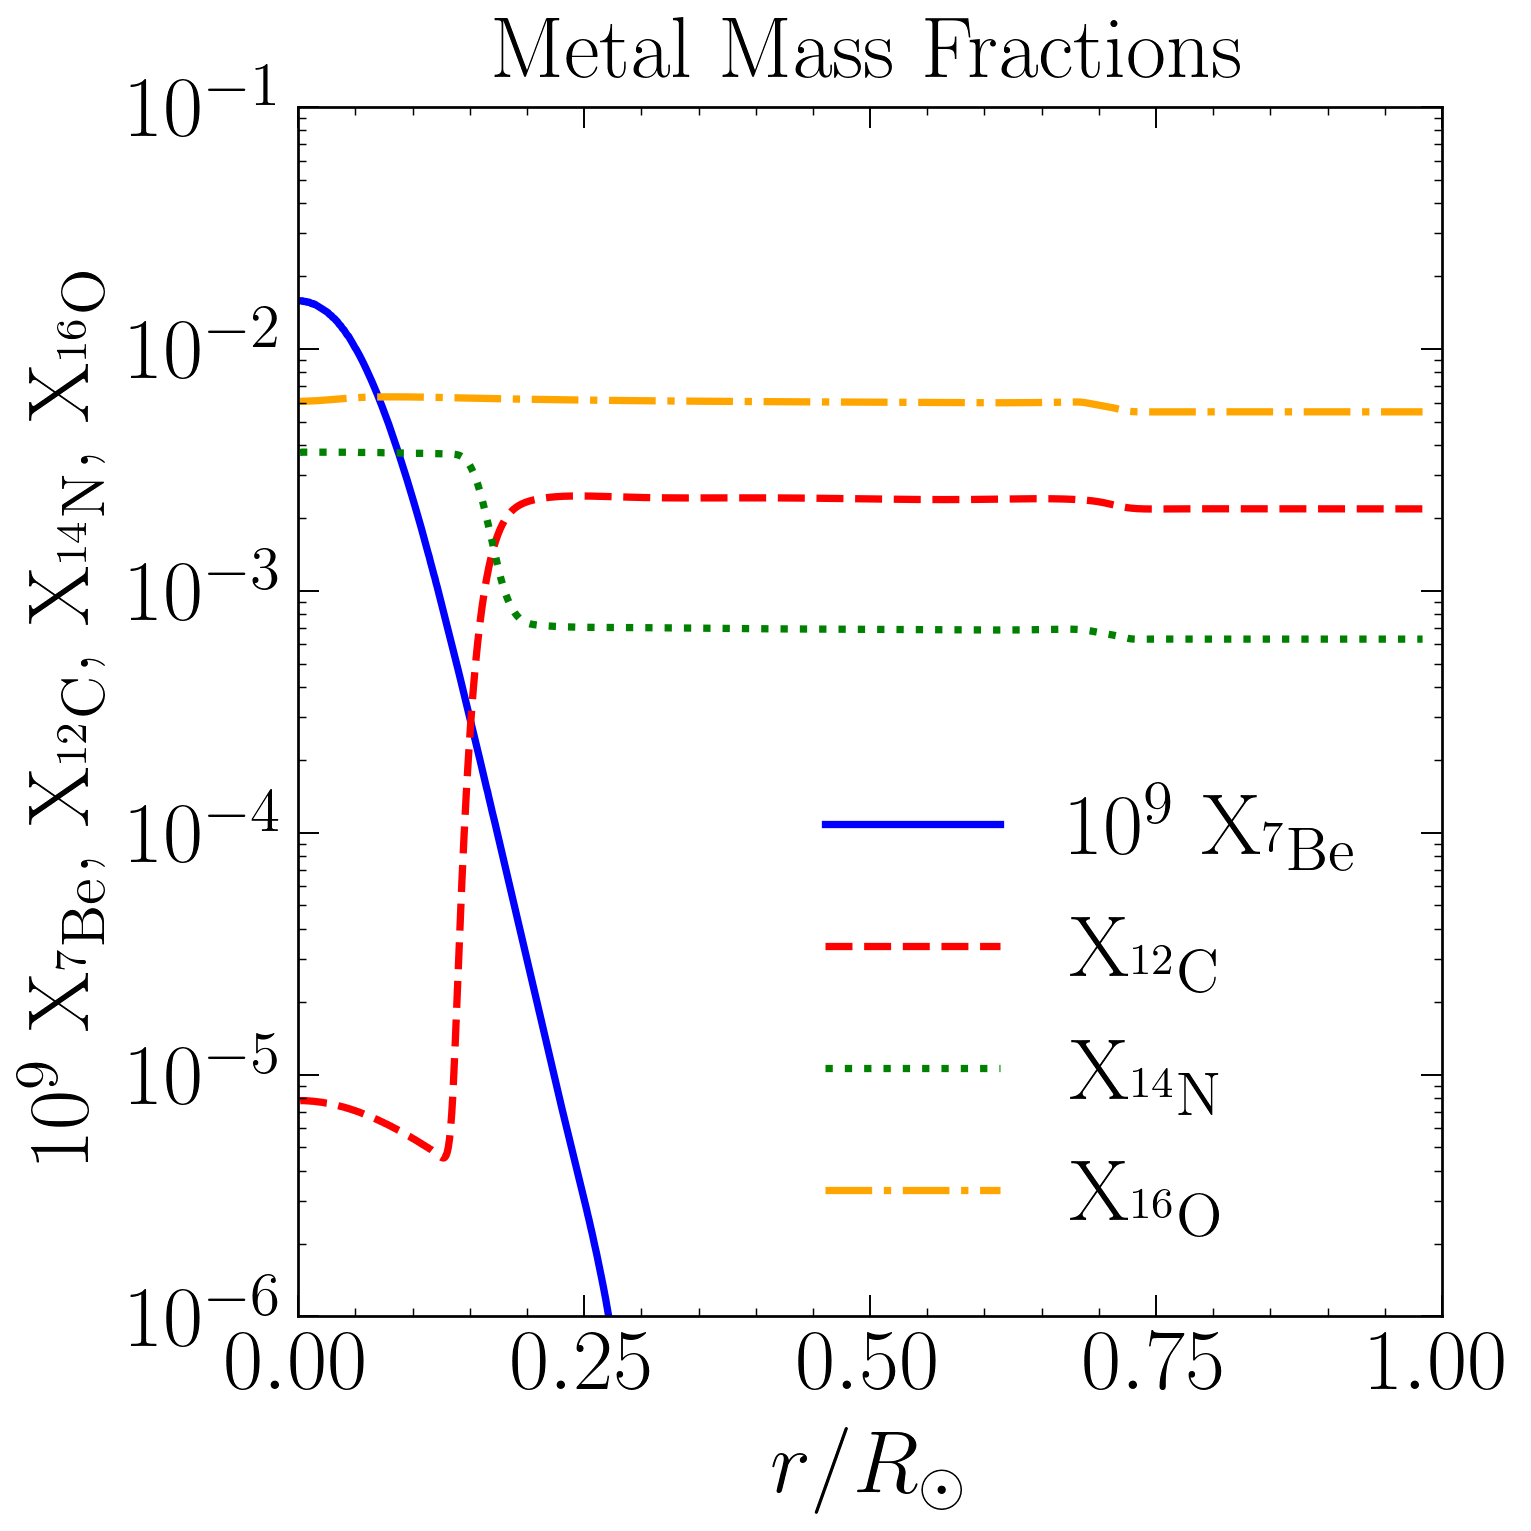

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
x = np.array(df_solar_model['r'])
berrylium = np.array(df_solar_model['X_7Be'])
carbon = np.array(df_solar_model['X_C12'])
nitrogen14 = np.array(df_solar_model['X_N14'])
oxygen16 = np.array(df_solar_model['X_O16'])

axes.plot(x,1e9 * berrylium,lw=1.5,ls='solid',color='blue',label=r'$10^9$ X$_{^7 \mathrm{Be}}$')
axes.plot(x,carbon,lw=1.5,ls='dashed',color='red',label=r'X$_{^{12} \mathrm{C}}$')
axes.plot(x,nitrogen14,lw=1.5,ls='dotted',color='green',label=r'X$_{^{14} \mathrm{N}}$')
axes.plot(x,oxygen16,lw=1.5,ls='dashdot',color='orange',label=r'X$_{^{16} \mathrm{O}}$')
axes.set_xlabel(r'$r/R_\odot$')
axes.set_ylabel(r'$10^9$ X$_{^7 \mathrm{Be}}$, X$_{^{12} \mathrm{C}}$, X$_{^{14} \mathrm{N}}$, X$_{^{16} \mathrm{O}}$',labelpad = 5)
axes.set_title('Metal Mass Fractions')
axes.set_yscale('log')
axes.set_xlim(0,1)
axes.set_ylim(1e-6,1e-1)
axes.legend()
plt.tight_layout()
plt.savefig('Images/X_metal(r).png')
plt.show()

## Mass

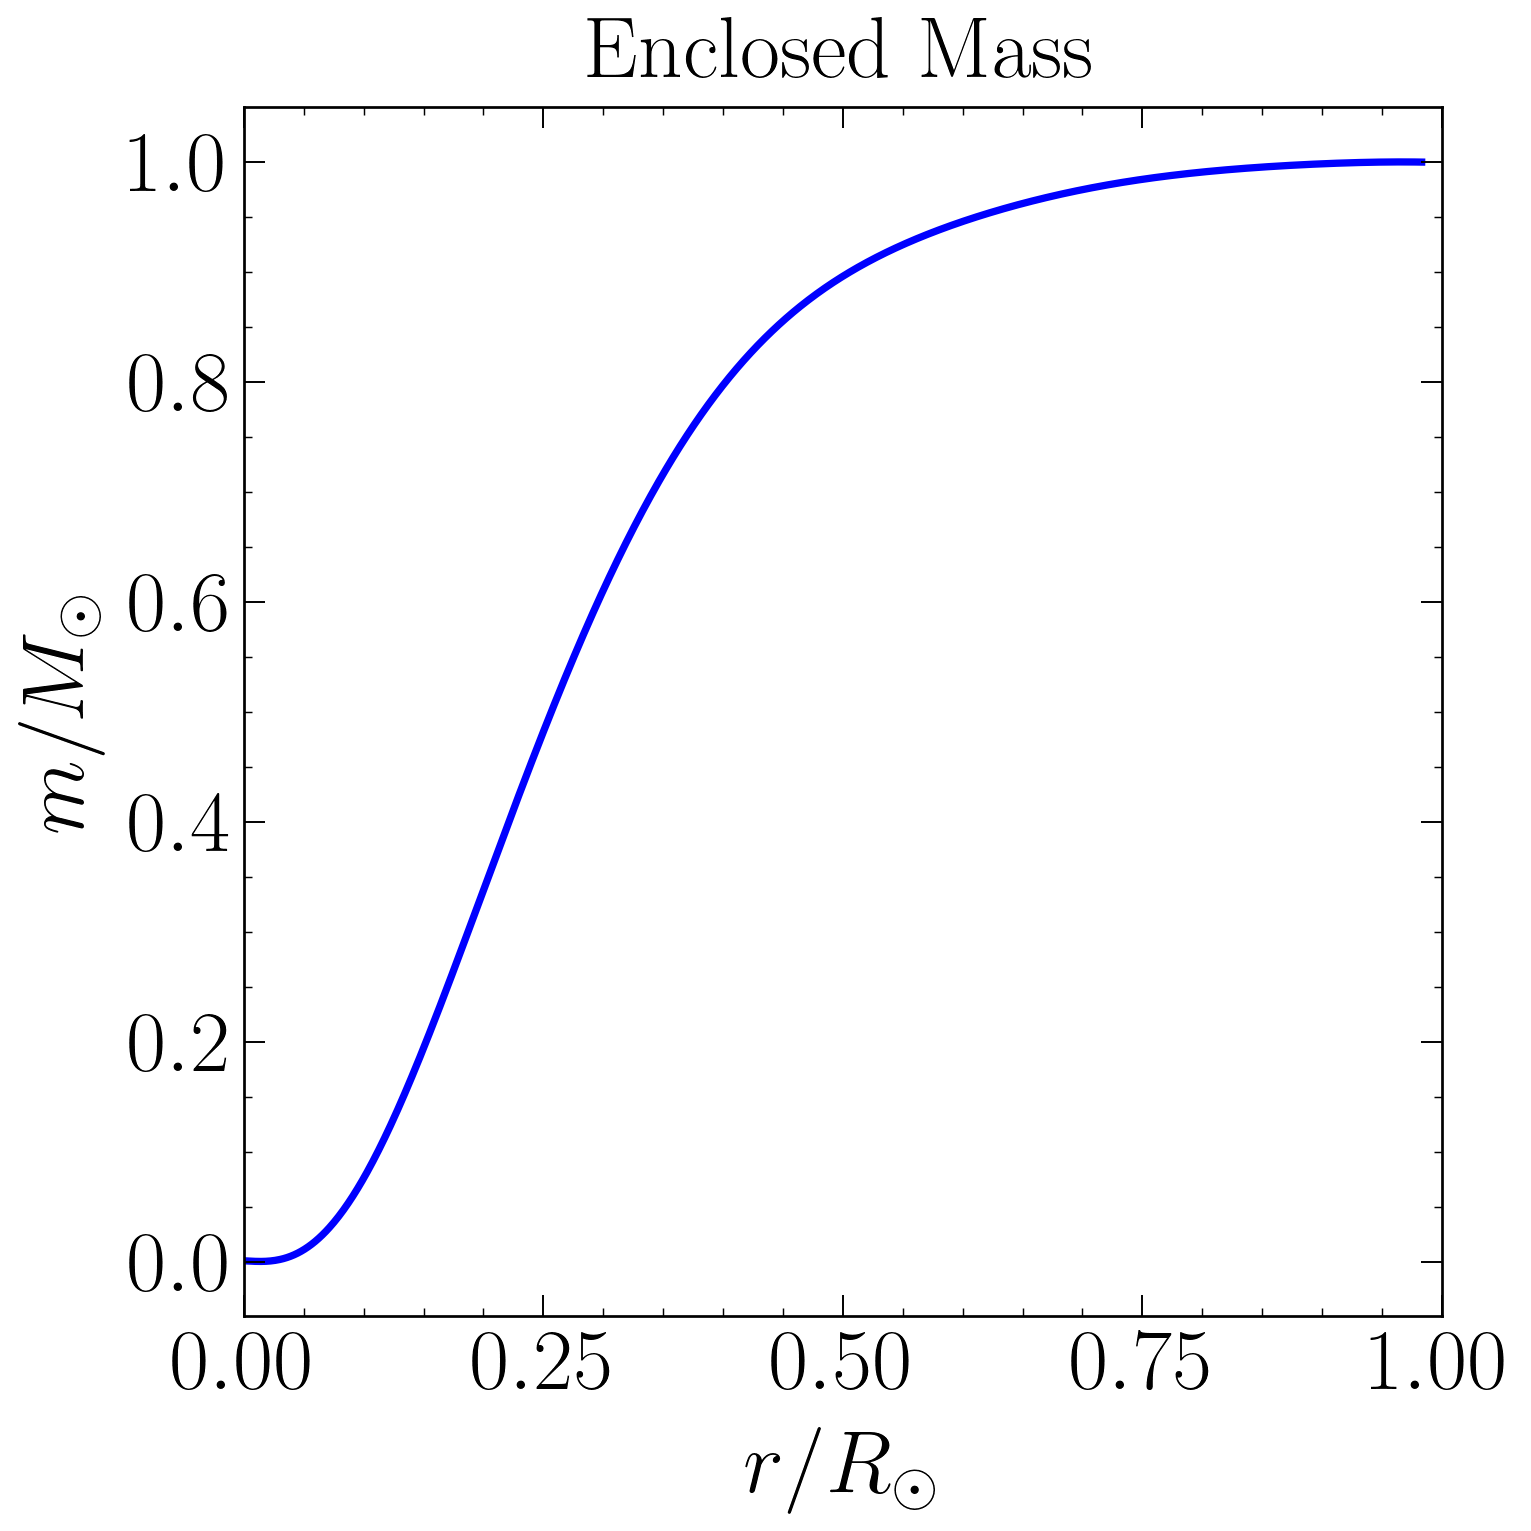

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
plotQuantity('r','m',False,False,ax,1.5,'blue',r'$r/R_\odot$',r'$m/M_\odot$','Enclosed Mass')
ax.set_xlim(0,1)
#ax.legend()
plt.tight_layout()
plt.savefig('Images/m(r).png')
plt.show()

## Luminosity

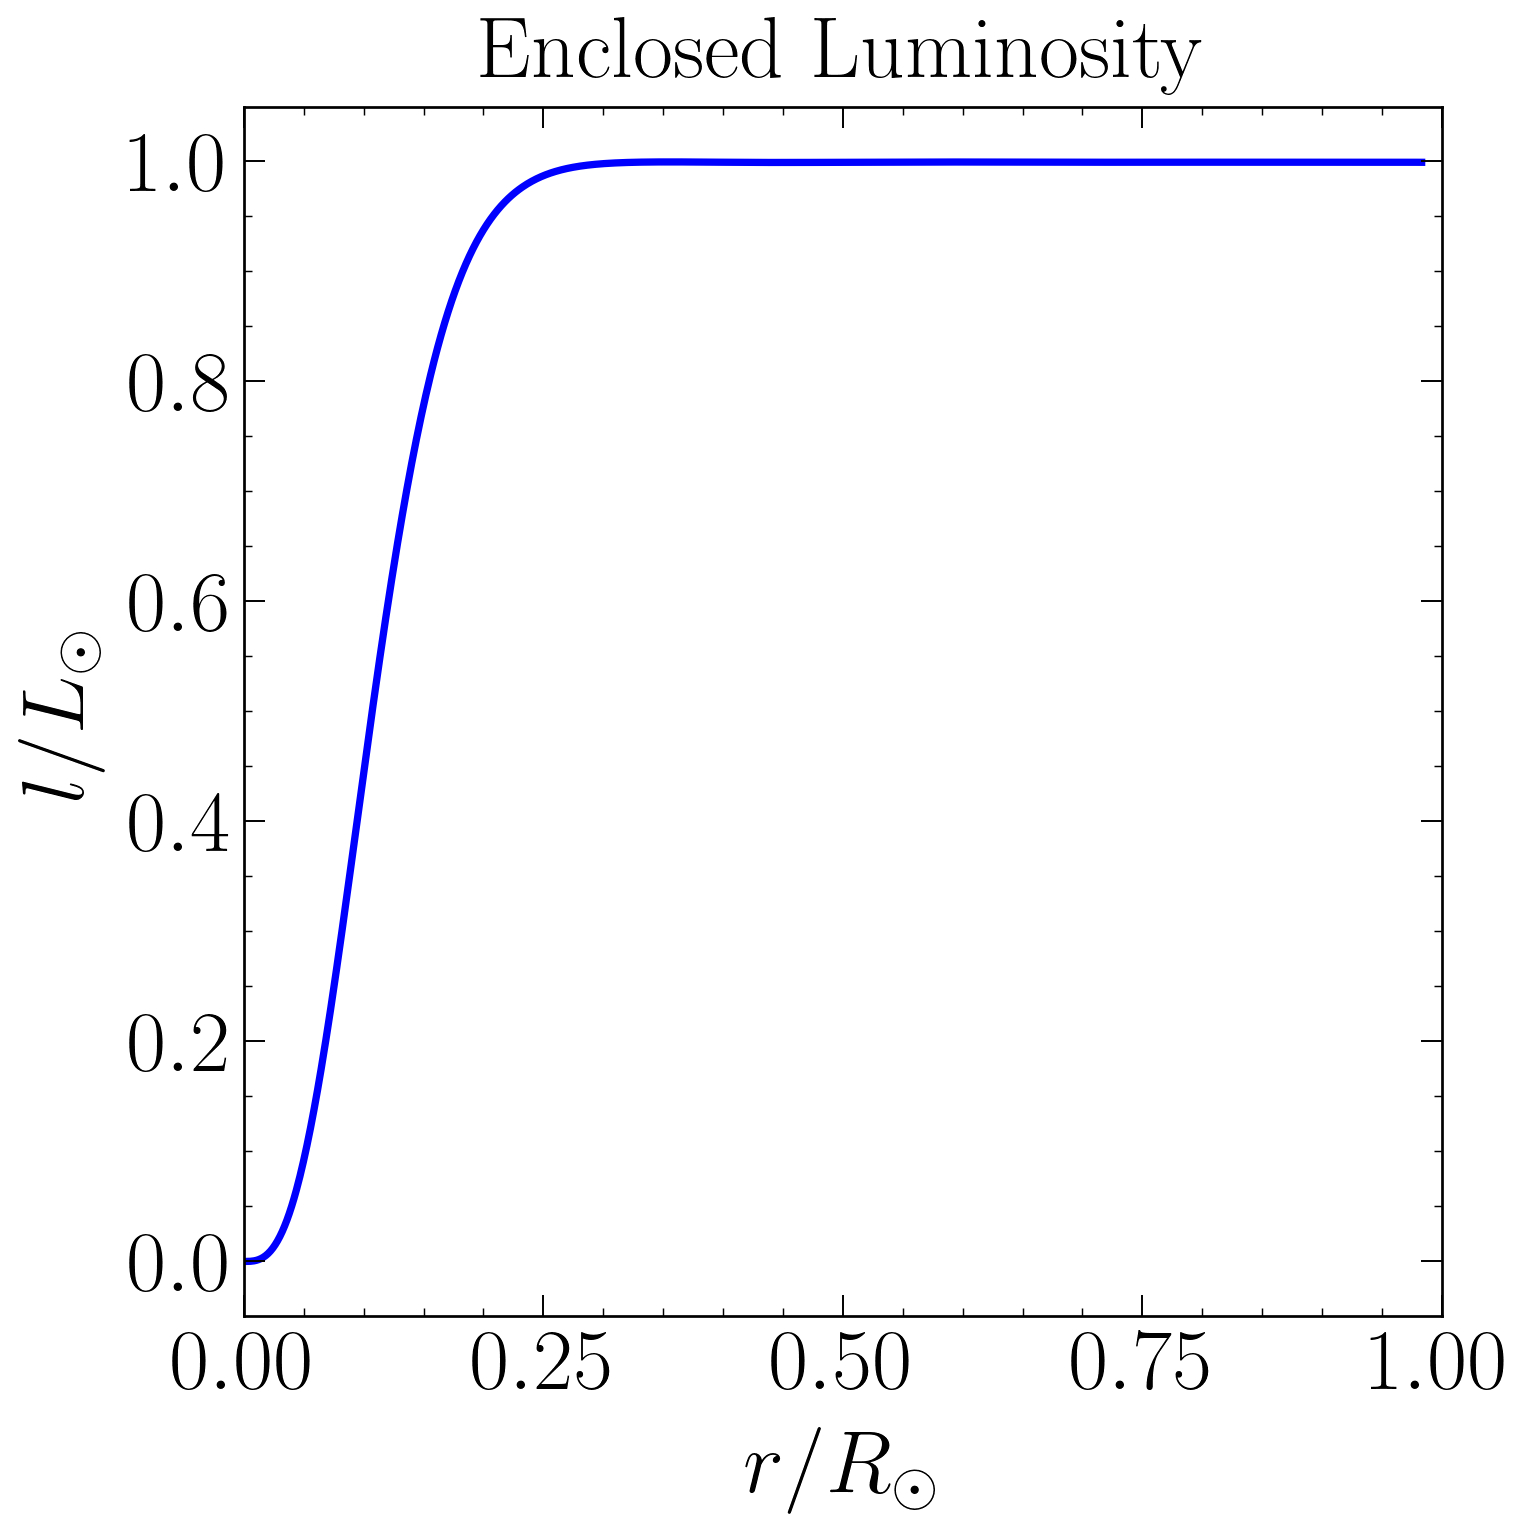

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
plotQuantity('r','l',False,False,ax,1.5,'blue',r'$r/R_\odot$',r'$l/L_\odot$','Enclosed Luminosity')
ax.set_xlim(0,1)
#ax.legend()
plt.tight_layout()
plt.savefig('Images/l(r).png')
plt.show()

# Plotting non-classical, relativistic physics in the Sun

## Get the electron density.

In [13]:
def getDensityProfile():
    n_e_data = pd.read_csv('n_e.csv',names=['r','n_e'])
    r,n_e = np.array(n_e_data['r']), 10**(np.array(n_e_data['n_e'])) * const.N_A.value * u.cm**-3
    return sp.interpolate.interp1d(r,n_e,fill_value=(n_e[0],n_e[-1]),bounds_error=True),r[0],r[-1]

In [14]:
n_r,r_min,r_max = getDensityProfile()

In [15]:
n_e =  n_r(np.array(df_solar_model['r']))
T = np.array(df_solar_model['T'])
rho = np.array(df_solar_model['rho'])
X_H = np.array(df_solar_model['X_H'])
X_He3 = np.array(df_solar_model['X_He3'])
X_He4 = np.array(df_solar_model['X_He4'])
Z = X_H - X_He3 - X_He4
mu = 4/(3 + 5*X_H - Z)

In [16]:
r = np.array(df_solar_model['r'])

In [17]:
d_e = (3/(4*np.pi*n_e))**(1/3) * u.cm
e = 4.803e-10 * u.cm**(3/2) * u.g**(1/2) * u.s**(-1)
gamma_e = (e**2 / (d_e * const.k_B * T * u.K)).to('')
lambda_e = (const.h * (2*np.pi * const.m_e * const.k_B * T * u.K)**(-1/2))
zeta_e = (lambda_e**3 * n_e * u.cm**(-3)).to('')
x_e = ((const.k_B * T * u.K)/(const.m_e * const.c**2)).to('')
a = 7.56e-15 * u.erg * u.cm**(-3) * u.K**(-4)
m_a = u.u
xi = (a*mu*m_a * (T*u.K)**3 / (3 * rho * u.g * u.cm**(-3) * const.k_B)).to('')

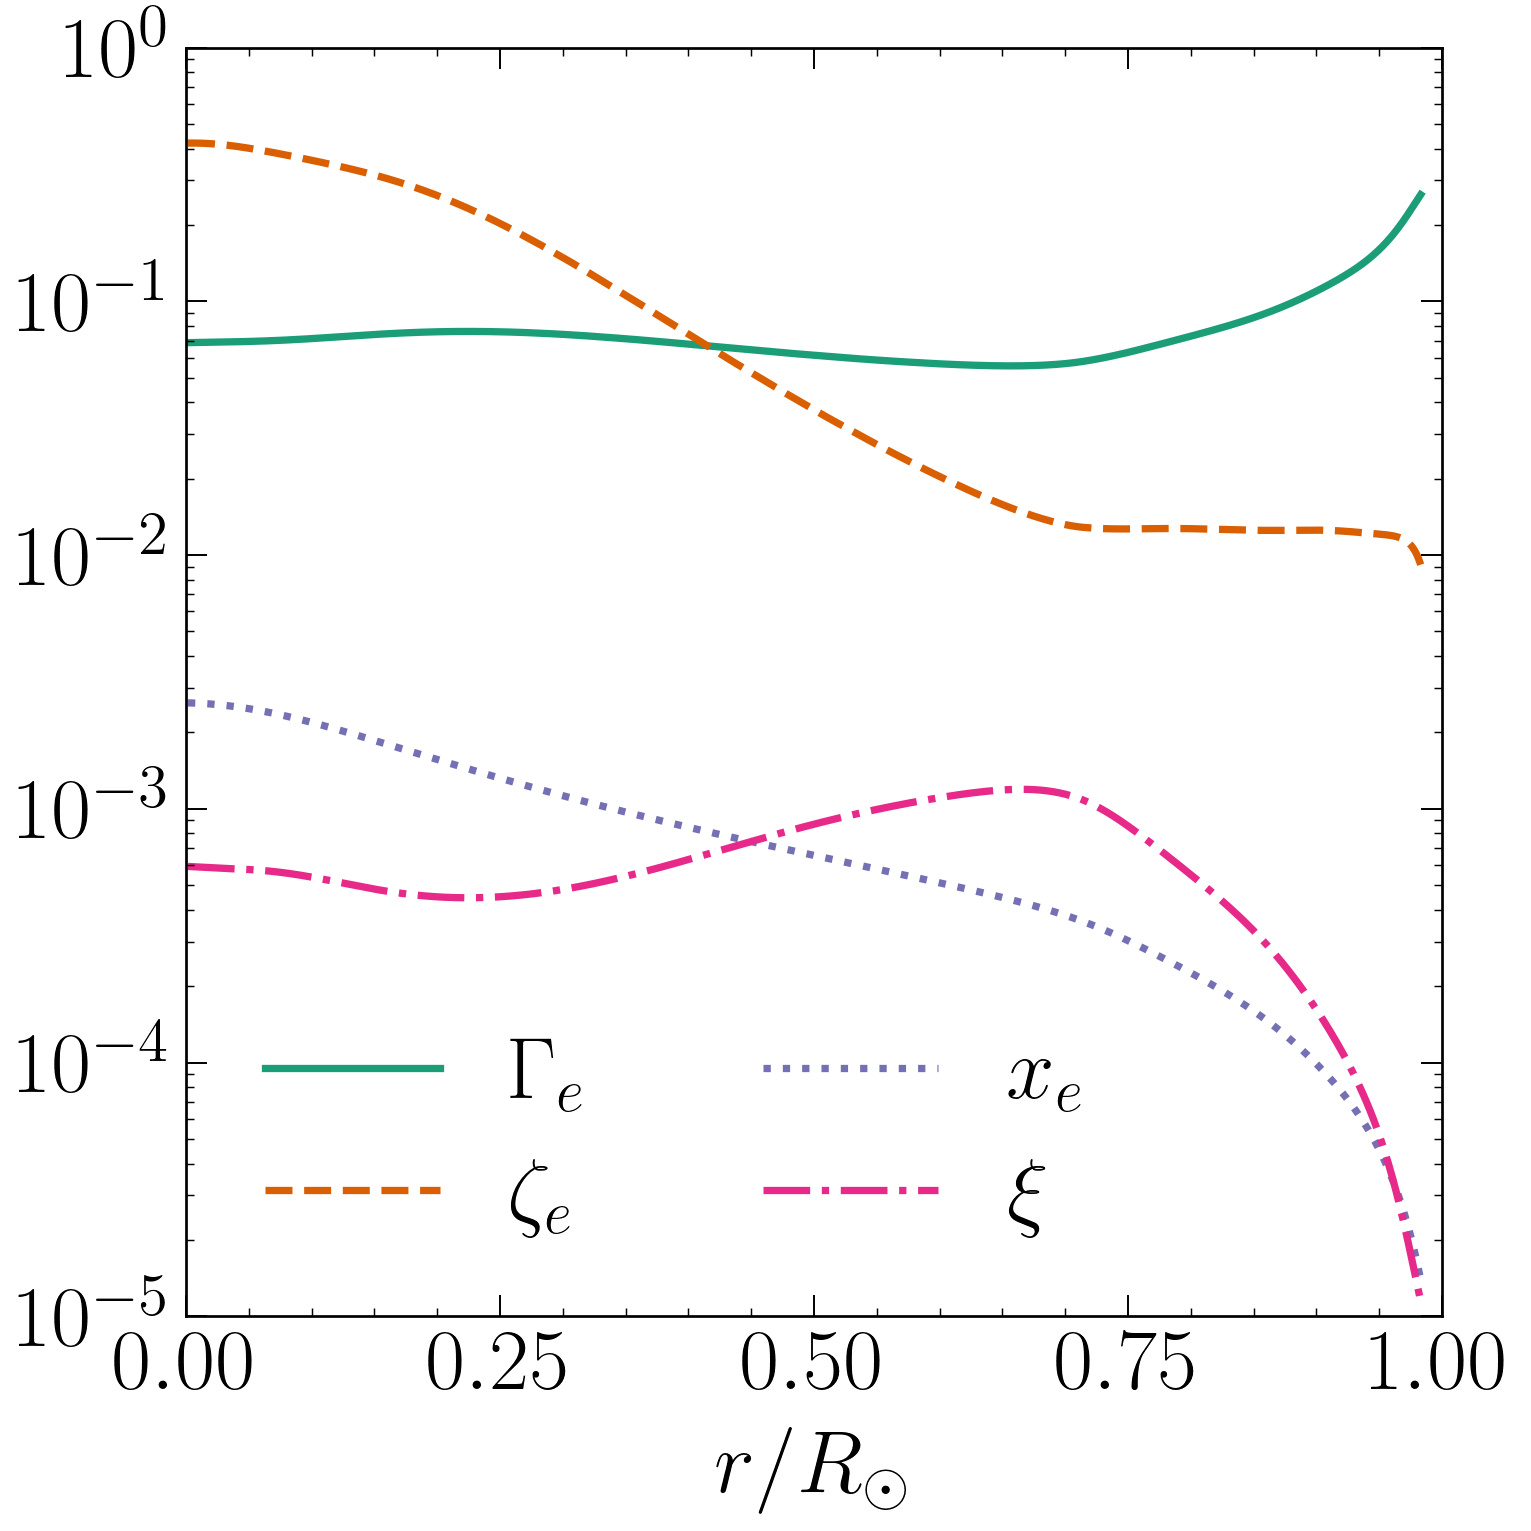

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
#plotQuantity('r','T',False,True,ax,1.5,'blue',r'$r/R_\odot$','$T$ [K]','Temperature Profile')
ax.set_xlim(0,1)
ax.set_ylim(1e-5,1)
#ax.legend()
ax.plot(r,gamma_e,lw=1.5,label=r'$\Gamma_e$')
ax.plot(r,zeta_e,ls='dashed',lw=1.5,label=r'$\zeta_e$')
ax.plot(r,x_e,ls='dotted',lw=1.5,label=r'$x_e$')
ax.plot(r,xi,ls='dashdot',lw=1.5,label=r'$\xi$')
ax.set_xlabel(r'$r/R_\odot$')
#ax.set_title('')
ax.set_yscale('log')
ax.legend(ncol=2)
plt.tight_layout()
plt.savefig('Images/weird_stuff.png')
plt.show()